In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.3.1


In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

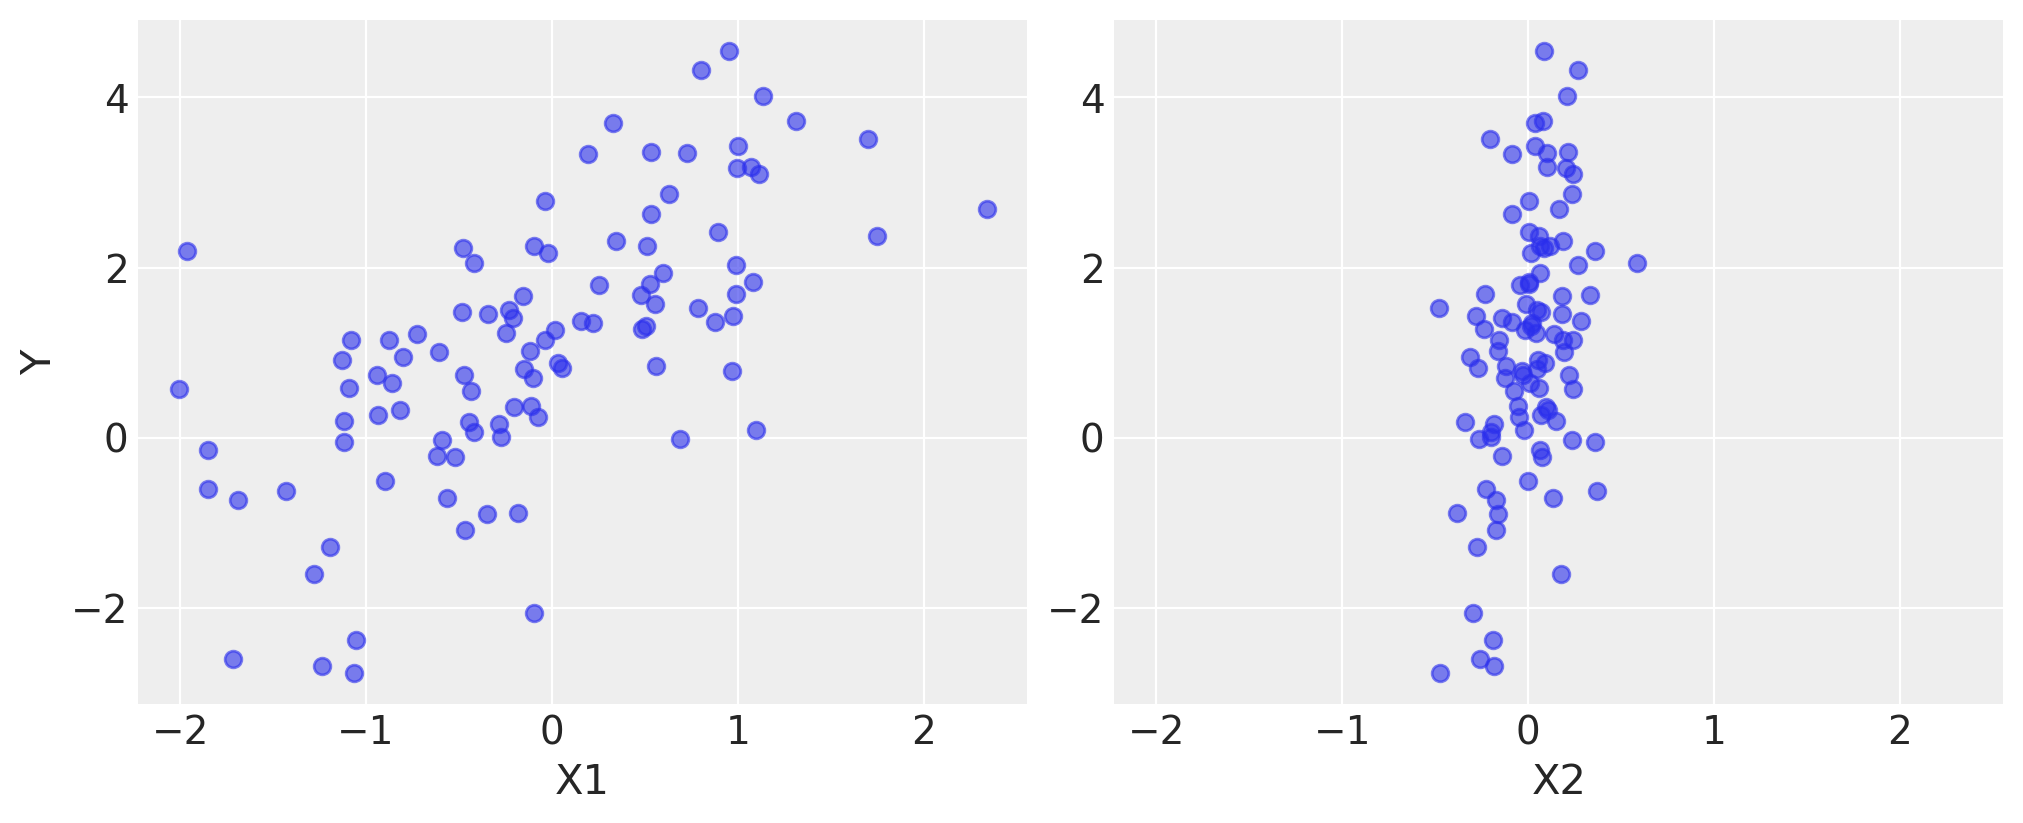

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [12]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [4]:
import scipy.stats as stats

In [31]:
it=10000
S_null, P_null = np.zeros((it,)),np.zeros((it,))
S_alt, P_alt = np.zeros((it,)),np.zeros((it,))
S_alt2, P_alt2 = np.zeros((it,)),np.zeros((it,))
for i in range(it):
    null1 = rng.normal(size=size)
    null2= rng.normal(size=size)
    alt1 = rng.normal(size=size)
    alt2= rng.normal(size=size)+0.25
    alt3 = rng.normal(size=size)
    alt4= 0.9*rng.normal(size=size)+0.15
    
    s_n,p_n=stats.ttest_ind(null1, null2, equal_var = False)
    s_a,p_a=stats.ttest_ind(alt1, alt2, equal_var = False)
    s_a2,p_a2=stats.ttest_ind(alt3, alt4, equal_var = False)
    
    S_null[i], P_null[i] = s_n, p_n
    S_alt[i], P_alt[i] = s_a, p_a
    S_alt2[i], P_alt2[i] = s_a2, p_a2
    

(array([  24.,  189.,  661., 1763., 2610., 2585., 1491.,  530.,  135.,
          12.]),
 array([-5.30087556, -4.57722704, -3.85357852, -3.12993   , -2.40628147,
        -1.68263295, -0.95898443, -0.23533591,  0.48831261,  1.21196113,
         1.93560966]),
 <BarContainer object of 10 artists>)

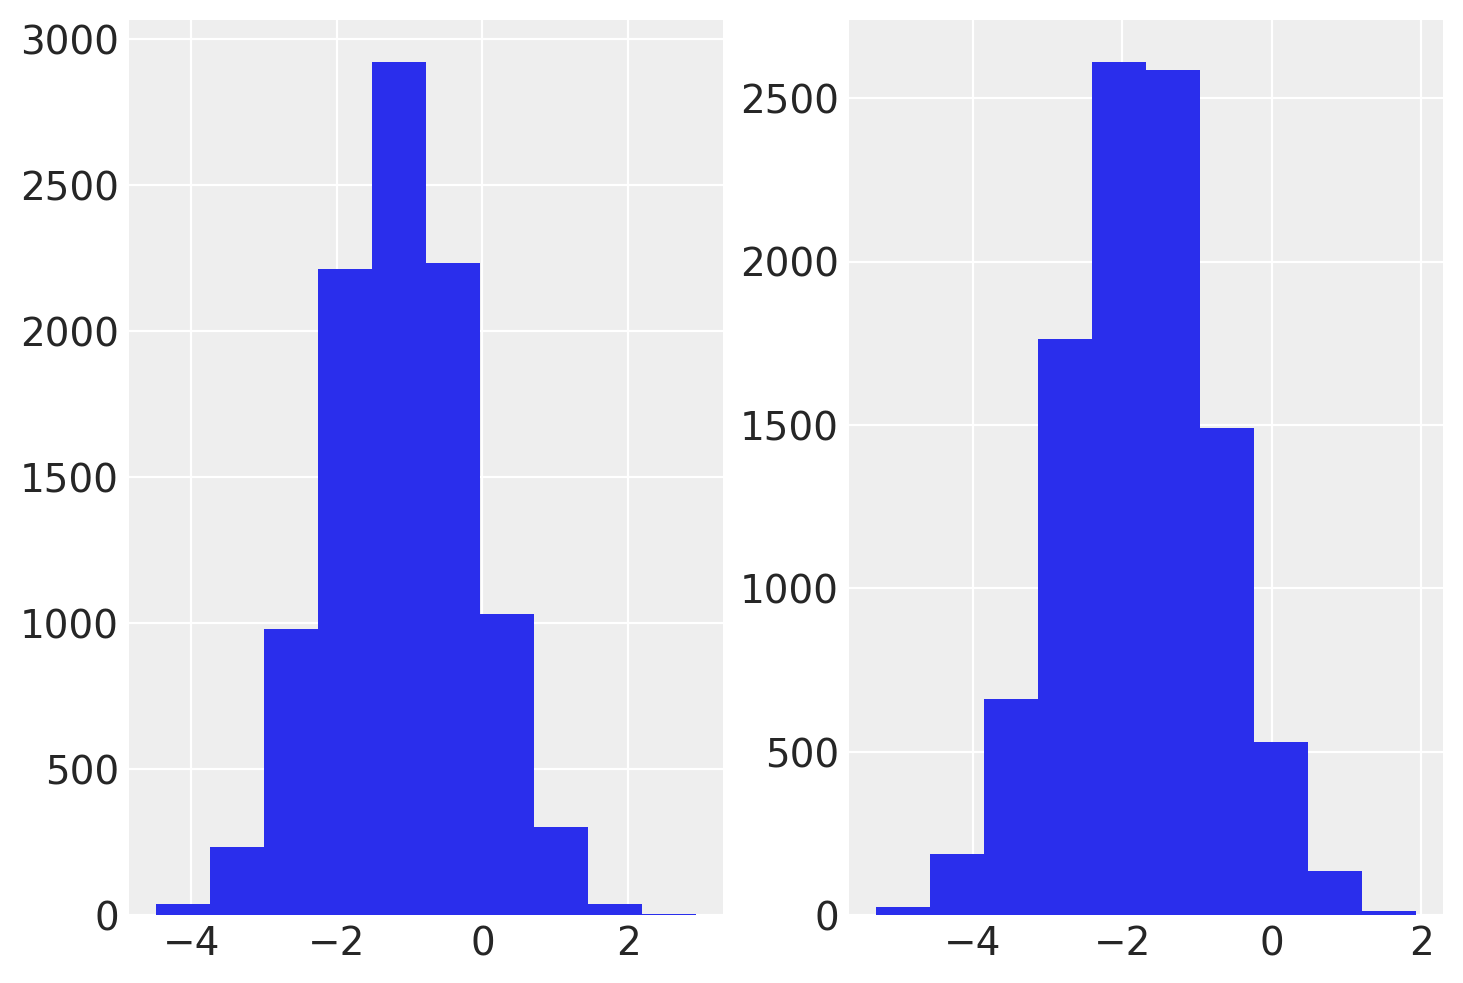

In [32]:
plt.subplot(1,2,1)
plt.hist(S_alt2)
plt.subplot(1,2,2)
plt.hist(S_alt)

(0.0, 2200.0)

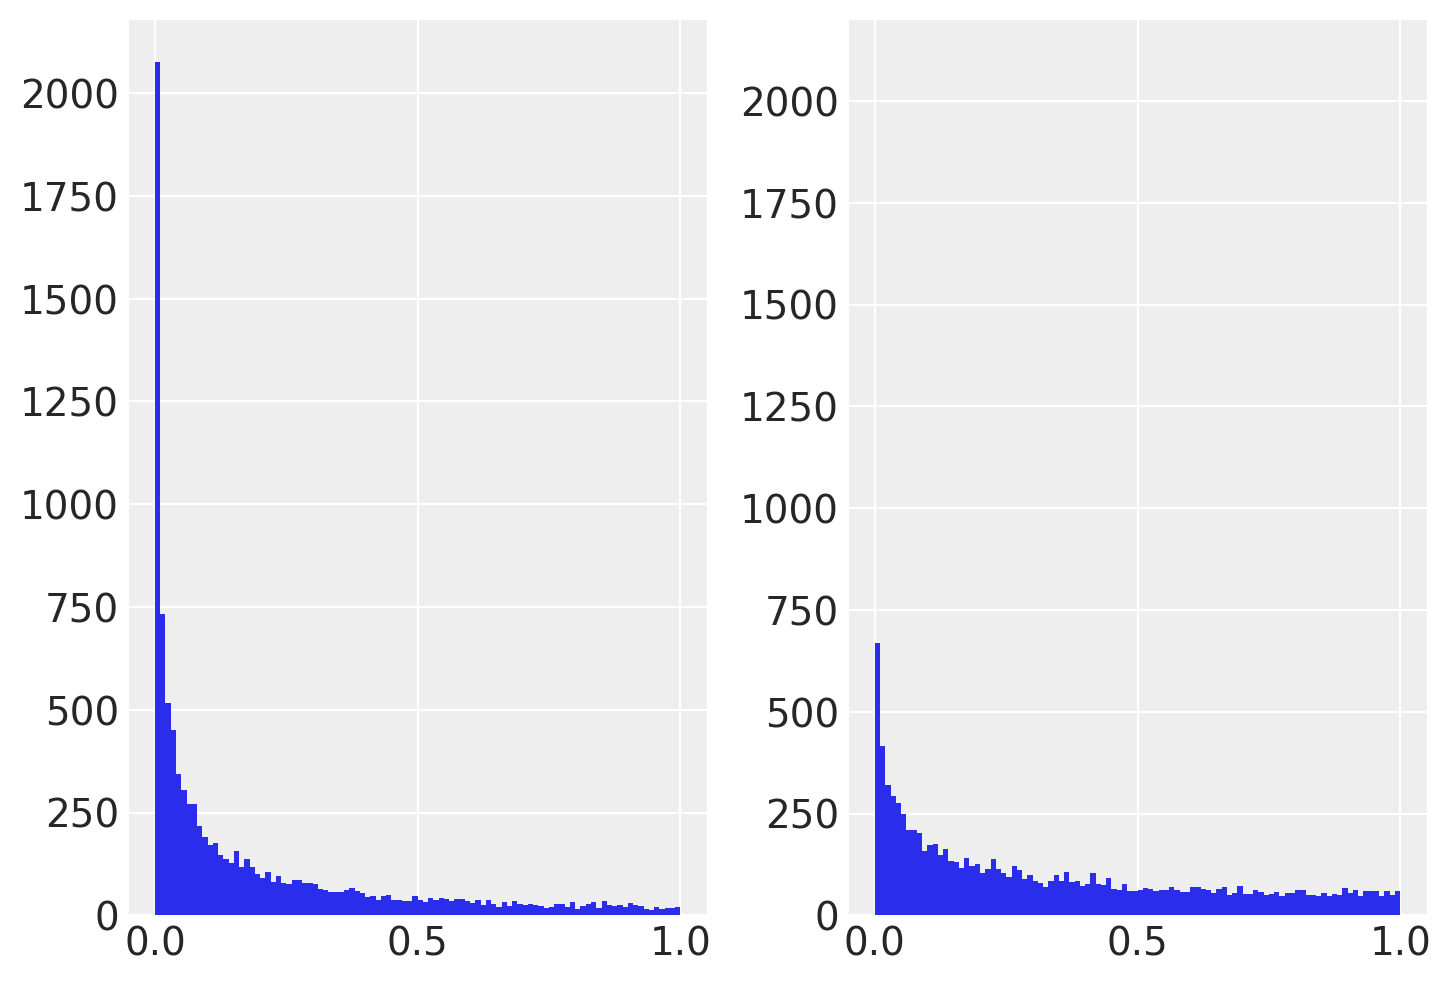

In [38]:
plt.subplot(1,2,1)
plt.hist(P_alt, bins=100)
plt.subplot(1,2,2)
plt.hist(P_alt2, bins=100)
plt.ylim([0,2200])